In [1]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.7 MB/s eta 0:00:00


Most likely hidden states: [2 2 0 2 0 1 0 2 0 2 0 1]
Probabilitatea secventei:  7.32594289717248e-08


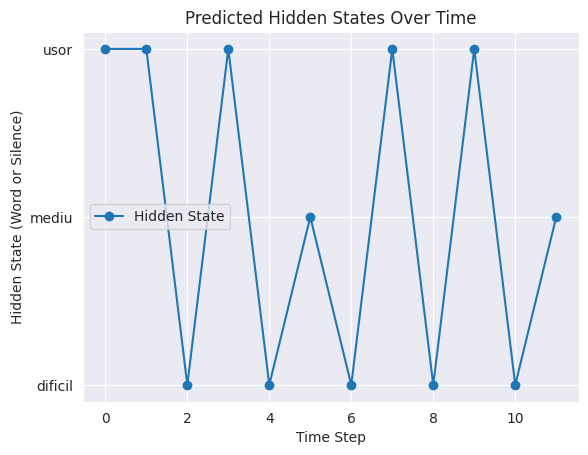

In [16]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches

states = ["dificil", "mediu", "usor"]
n_states = len(states)

observations = ["FB", "B", "S", "NS"]
n_observations = len(observations)

transition_probability = np.array([
    [0.0, 0.5, 0.5],
    [0.5, 0.25, 0.25],
    [0.5, 0.25, 0.25]
])

emission_probability = np.array([
    [0.1, 0.2, 0.4, 0.3],  #dificil
    [0.15, 0.25, 0.5, 0.1], #mediu
    [0.2, 0.3, 0.4, 0.1]    #usor
])

start_probability = np.array([1/3, 1/3, 1/3])

model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

#0=FB, 1=B, 2=S, 3=NS
observations_sequence = np.array([0, 0, 2, 1, 1, 2, 1, 1, 3, 1, 1, 2]).reshape(-1, 1)

hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

logprob = model.score(observations_sequence)
print("Probabilitatea secventei: ", np.exp(logprob))

sns.set_style("darkgrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel("Time Step")
plt.ylabel("Hidden State (Word or Silence)")
plt.yticks(ticks=range(n_states), labels=states)
plt.legend()
plt.title("Predicted Hidden States Over Time")
plt.show()
